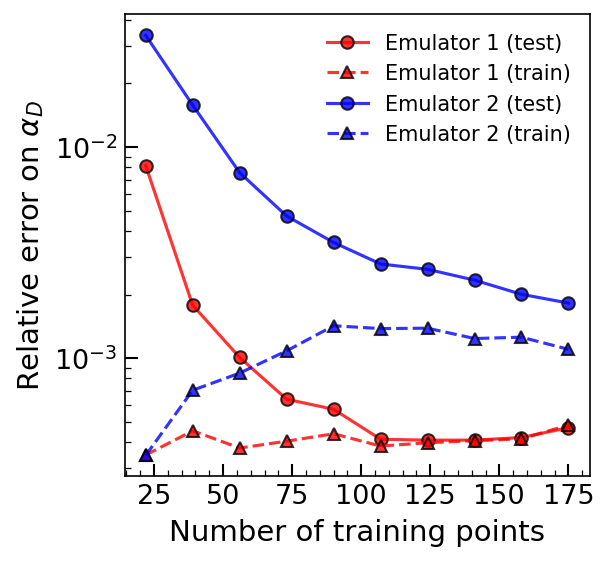

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl

# Training sizes (per tier)
n = [22, 39, 56, 73, 90, 107, 124, 141, 158, 175]
tiers = range(1, 11)
seeds = [123+i for i in range(100)]


mpl.rcParams.update({
    # Ticks pointing inward on both axes
    "xtick.direction": "in",
    "ytick.direction": "in",


    # Make minor ticks visible too
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,

    # Tick lengths/widths (optional, tweak as you like)
    "xtick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.major.size": 6,
    "ytick.minor.size": 3,
    "xtick.major.width": 1.0,
    "ytick.major.width": 1.0,

    # Increase tick-label font size
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,

    # (Nice to have) larger axis labels/titles globally
    "axes.labelsize": 14,
    "axes.titlesize": 14,
})







def emulator_stats_and_curves(em_tag, color, label, sets, lsl, marker ):
    """
    Load all seeds for an emulator, return mean and std across seeds.
    Also plot the individual seed curves in light gray.
    """
    per_seed_means = []
    for seed in seeds:
        seed_means = []
        for i in tiers:
            df = pd.read_csv(f"../dipoles_exp_param/alphaD_eval_{em_tag}_{seed}/alphaD_relerr_{sets}_tier{i}.csv")
            seed_means.append(df["rel_abs"].to_numpy().mean())
        per_seed_means.append(seed_means)
        # plot this seed in light gray
        #plt.plot(n, seed_means, '-', color="lightgray", linewidth=1, alpha=0.8)

    per_seed_means = np.asarray(per_seed_means)  # shape (4, 10)
    mean = per_seed_means.mean(axis=0)
    std  = per_seed_means.std(axis=0)
    
    # plot mean + band
    plt.plot(n, mean, marker = marker, color=color, label=f'{label}', ls = lsl, mec = 'black', alpha = 0.8)
    #plt.fill_between(n, mean - std, mean + std, color=color, alpha=0.3, label=f'{label} ±1σ')
    
    return mean, std

# ---- Plot ----
plt.figure(figsize=(4,4), dpi = 150)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25))

# Em1 (blue)
em1_mean, em1_std = emulator_stats_and_curves("Em1", color="red", label="Emulator 1 (test)", sets="test", lsl = '-',
                                             marker = 'o')

# Em2 (orange)
em2_mean, em2_std = emulator_stats_and_curves("Em1", color="red", label="Emulator 1 (train)", sets="train", lsl = '--',
                                             marker = '^')


# Em1 (blue)
em1_mean, em1_std = emulator_stats_and_curves("Em2", color="blue", label="Emulator 2 (test)", sets="test", 
                                              lsl = '-', marker = 'o')

# Em2 (orange)
em2_mean, em2_std = emulator_stats_and_curves("Em2", color="blue", label="Emulator 2 (train)", sets="train", lsl = '--',
                                             marker = '^')




plt.yscale('log')
plt.ylabel(r'Relative error on $\alpha_D$')
plt.xlabel('Number of training points')
plt.legend(frameon=False)


plt.savefig('NumberOfTrain.pdf', bbox_inches='tight')


# 